<a href="https://colab.research.google.com/github/AshishGusain17/via_google_colab/blob/master/butterfly_detection_using_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 33899, done.
remote: Total 33899 (delta 0), reused 0 (delta 0), pack-reused 33899
Receiving objects: 100% (33899/33899), 512.16 MiB | 42.21 MiB/s, done.
Resolving deltas: 100% (21719/21719), done.
Checking out files: 100% (3196/3196), done.


In [2]:
!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml
!pip install --user jupyter
!pip install --user matplotlib

In [3]:
!python /content/models/research/setup.py build
!python /content/models/research/setup.py install

running build
running install
running bdist_egg
running egg_info
creating object_detection.egg-info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
reading manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/e

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
!cp -r --recursive '/content/drive/My Drive/colab_obj_detection/faster_rcnn_resnet101_coco_2018_01_28' '/content/models/research/object_detection'
!cp -r --recursive '/content/drive/My Drive/colab_obj_detection/training' '/content/models/research/object_detection'
!cp -r --recursive '/content/drive/My Drive/colab_obj_detection/images' '/content/models/research/object_detection'

In [9]:
!python3 legacy/train.py --train_dir=training --pipeline_config_path=training/faster_rcnn_resnet101_coco.config

Traceback (most recent call last):
  File "legacy/train.py", line 50, in <module>
    from object_detection.builders import dataset_builder
ModuleNotFoundError: No module named 'object_detection'


In [12]:

%cd content/models/research
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim
%cd object_detection/legacy
!python3 train.py --logtostderr --train_dir=../training --pipeline_config_path=../training/faster_rcnn_resnet101_coco.config
%cd ..
%cd ..
%cd ..
%cd ..
%cd ..

/content/models/research
env: PYTHONPATH=/content/models/research:/content/models/research/slim
/content/models/research/object_detection/legacy
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Instructions for updating:
Use object_detection/model_main.py.
W0123 19:22:21.172119 139914533353344 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.

W0123 19:22:21.172333 139914533353344 module_wrapper.py:139] From train.py:91: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0

In [14]:
!python3 /content/models/research/object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path  /content/models/research/object_detection/training/faster_rcnn_resnet101_coco.config --trained_checkpoint_prefix  /content/models/research/object_detection/training/model.ckpt-1228 --output_directory /content/models/research/object_detection/inference-graph


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0123 19:36:44.501520 140418228443008 module_wrapper.py:139] From /content/models/research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0123 19:36:44.507190 140418228443008 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0123 19:36:44.507546 140418228443008 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:121: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instea

In [41]:
%cd /content/models/research/object_detection
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')
%ls

/content/models/research/object_detection
anchor_generators/                      legacy/
box_coders/                             matchers/
builders/                               meta_architectures/
CONTRIBUTING.md                         metrics/
core/                                   model_hparams.py
data/                                   model_lib.py
data_decoders/                          model_lib_test.py
dataset_tools/                          model_lib_v2.py
dockerfiles/                            model_lib_v2_test.py
eval_util.py                            model_main.py
eval_util_test.py                       models/
exporter.py                             model_tpu_main.py
exporter_test.py                        object_detection_tutorial.ipynb
export_inference_graph.py               predictors/
export_tflite_ssd_graph_lib.py          protos/
export_tflite_ssd_graph_lib_test.py     __pycache__/
export_tflite_ssd_graph.py              README.md
faster_rcnn_resnet101_coco_2018

In [0]:
# This is needed to display the images.
%matplotlib inline

In [0]:
from utils import label_map_util

from utils import visualization_utils as vis_util

In [0]:
MODEL_NAME = 'inference-graph'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = 'training/labelmap.pbtxt'

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [0]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:

# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 12) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

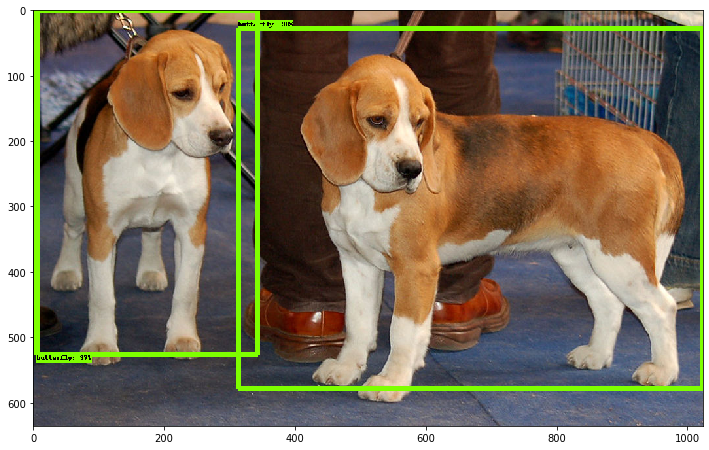

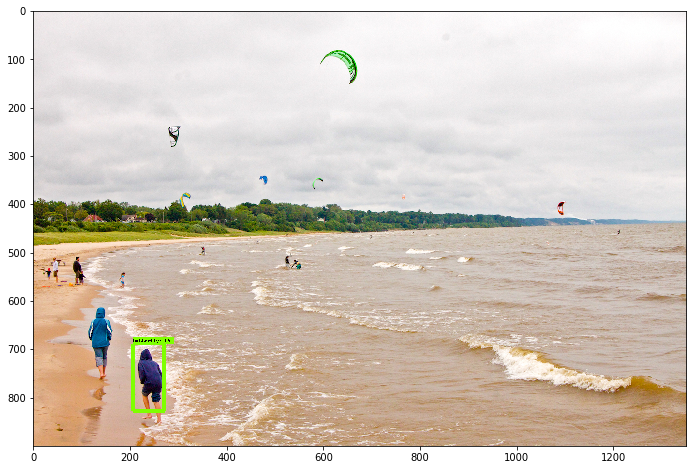

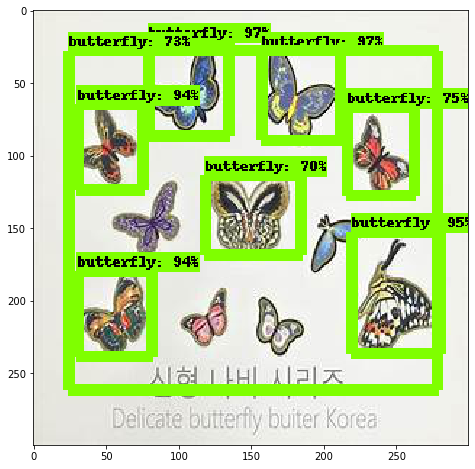

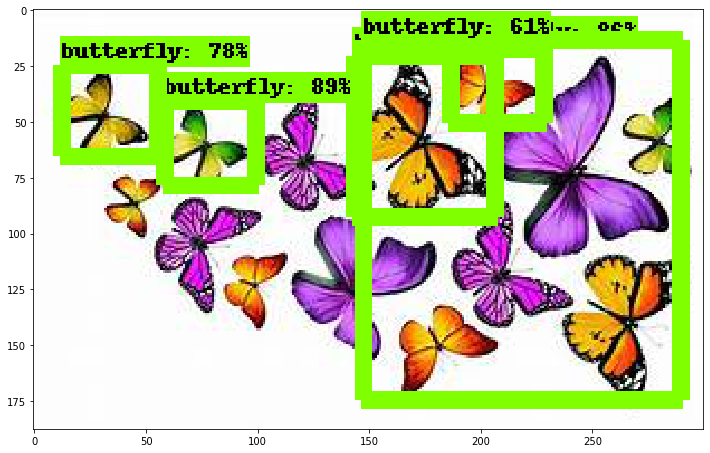

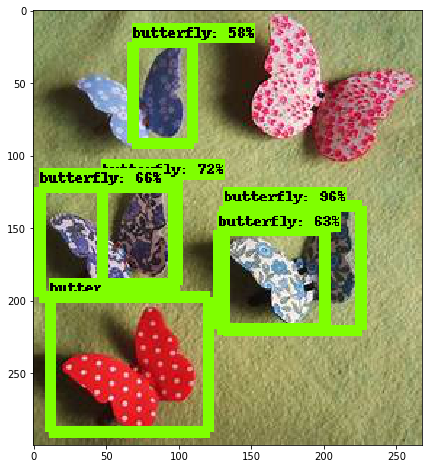

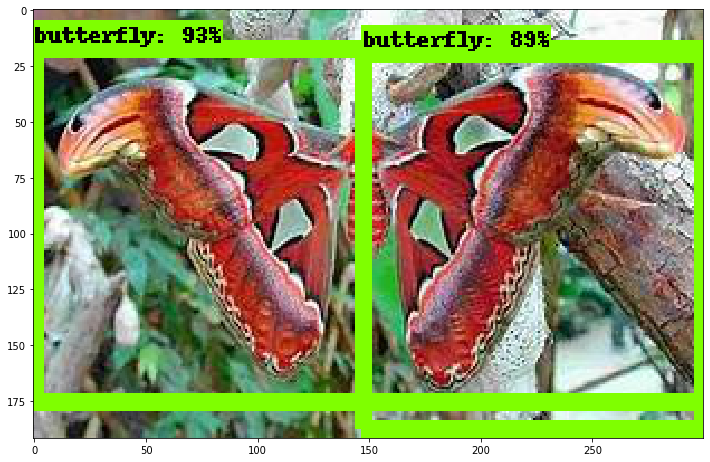

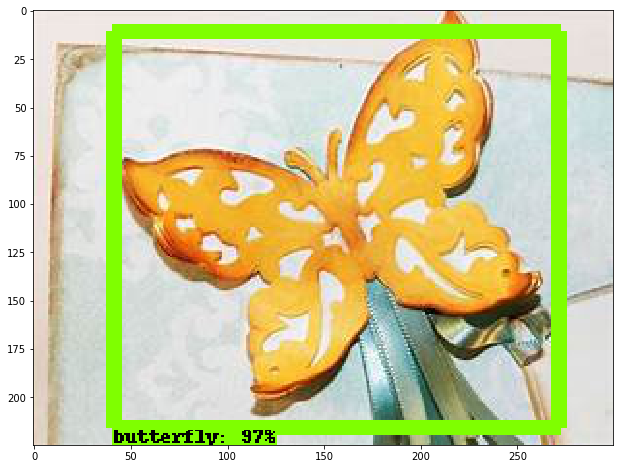

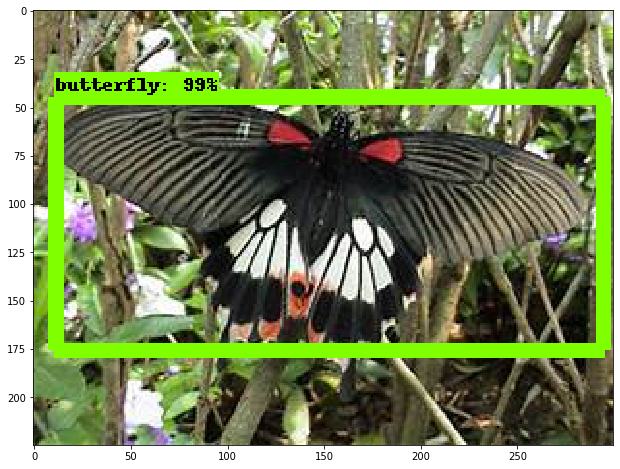

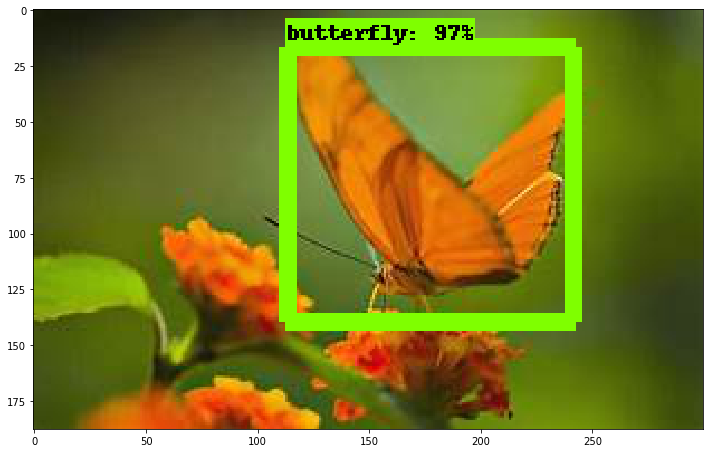

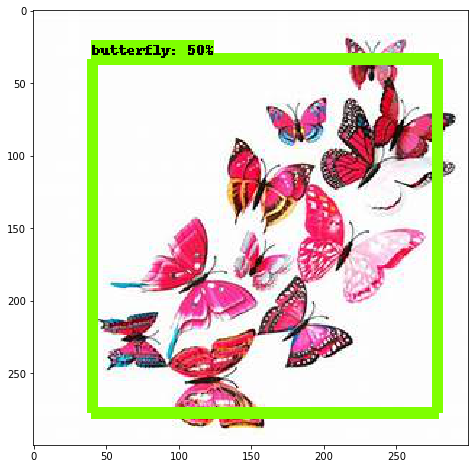

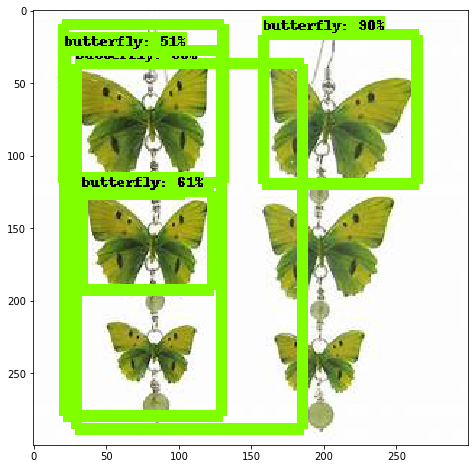

In [43]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  # print(image_np)
  plt.imshow(image_np)
  # plt.show()